Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.5464 - loss: 1.1307

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


340/340 ━━━━━━━━━━━━━━━━━━━━ 226s 658ms/step - accuracy: 0.5469 - loss: 1.1297 - val_accuracy: 0.8482 - val_loss: 0.4412
Epoch 2/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.8438 - loss: 0.5154 - val_accuracy: 0.7000 - val_loss: 0.7749
Epoch 3/15


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


340/340 ━━━━━━━━━━━━━━━━━━━━ 162s 477ms/step - accuracy: 0.8371 - loss: 0.4473 - val_accuracy: 0.8984 - val_loss: 0.2881
Epoch 4/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - accuracy: 0.8750 - loss: 0.3126 - val_accuracy: 0.9000 - val_loss: 0.3365
Epoch 5/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 161s 474ms/step - accuracy: 0.8707 - loss: 0.3458 - val_accuracy: 0.9040 - val_loss: 0.2587
Epoch 6/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.8750 - loss: 0.5490 - val_accuracy: 0.8000 - val_loss: 0.2440
Epoch 7/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 160s 471ms/step - accuracy: 0.8874 - loss: 0.3041 - val_accuracy: 0.9349 - val_loss: 0.1796
Epoch 8/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.9688 - loss: 0.1198 - val_accuracy: 0.9000 - val_loss: 0.2835
Epoch 9/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 157s 462ms/step - accuracy: 0.9016 - loss: 0.2628 - val_accuracy: 0.9498 - val_loss: 0.1327
Epoch 10/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step - accuracy: 0.9062 - loss: 0.3373 - va

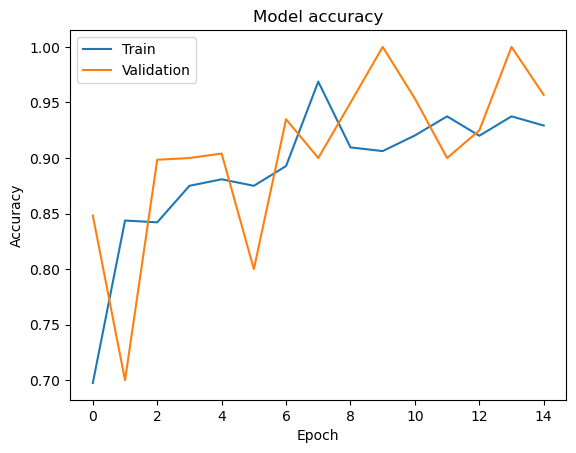

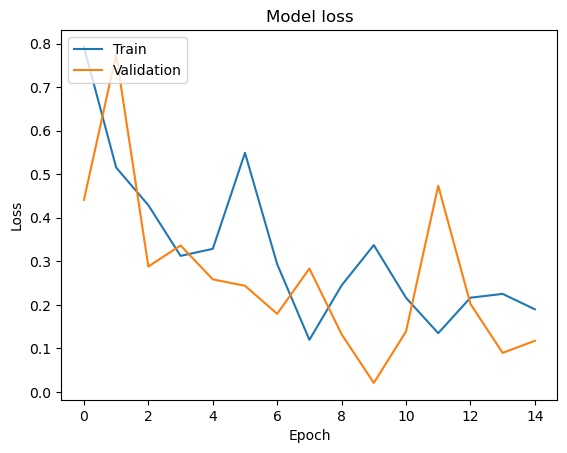

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Paths to your dataset
train_dir = 'dataset_fresh/train'
validation_dir = 'dataset_fresh/test'

# Image data generators for loading and augmenting the dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Rescale pixel values (normalization)
    rotation_range=20,        # Randomly rotate images
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Randomly zoom in on images
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in new pixels that result from transformations
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images from the directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),      # Resize images to 150x150 pixels
    batch_size=32,               # Number of images per batch
    class_mode='categorical'     # Use 'categorical' for multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # First convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),                                                # Max pooling layer

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),                             # Second convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),                            # Third convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),                            # Fourth convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),                                                         # Flattening the 3D outputs to 1D

    tf.keras.layers.Dense(512, activation='relu'),                                     # Fully connected layer
    tf.keras.layers.Dense(6, activation='softmax')                                     # Output layer for 6 classes
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',    # For multi-class classification
    optimizer=tf.keras.optimizers.Adam(),  # Adam optimizer
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,                         # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Save the trained model
model.save('fruit_freshness_classifier.h5')

# Optionally, you can also plot accuracy and loss curves
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
The image is predicted to be: rottenbanana


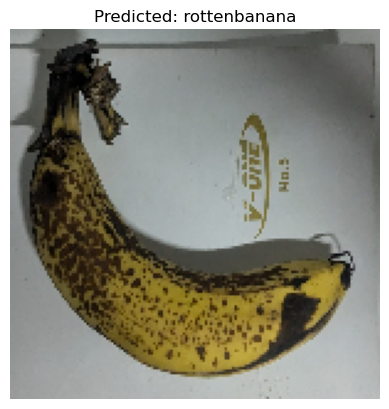

In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('fruit_freshness_classifier.h5')

# Load and preprocess the image you want to classify
img_path = 'freshtest/rottedbanana.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Class labels (make sure these match your training labels)
class_labels = ['freshapple', 'freshbanana', 'freshorange', 'rottenapple', 'rottenbanana', 'rottenorange']
predicted_label = class_labels[predicted_class]
print(f'The image is predicted to be: {predicted_label}')

# Display the image
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')  # Turn off axis labels
plt.show()

